In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data_vo2 = pd.read_csv("/Users/xiaochunkuang/Desktop/EXOS/data_vo2.csv")

In [22]:
data_demographics = pd.read_csv("/Users/xiaochunkuang/Desktop/EXOS/data_demographics.csv")

In [23]:
data_workout = pd.read_csv("/Users/xiaochunkuang/Desktop/EXOS/data_workout.csv")

In [24]:
data = pd.merge(data_vo2,data_workout,on=['Campus','Location','User ID'])

In [25]:
finaldata = pd.merge(data,data_demographics, on='md5 of email')

In [104]:
finaldata.head()

User ID  Campus    Location                      md5 of email  \
0     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
2     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
3     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
5     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
6     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   

      Source Datetime            Datetime  Enterer ID Enterer Name  \
0 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
2 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
3 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
5 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
6 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   

  Edit or new  eval id  ...  Workout Number      Emphasis  Progression    ID  \
0         new     4236  ...            76.0     Threshold          6.0  1137   
2         new     4236  ...            87.0     Threshold         17.0  1137   
3         new     4236  ...           107.0  Leg Strength          9.0  1137   
5         new     4236  ...            88.0     Threshold         18.0  1137   
6         new     4236  ...            60.0      Recovery          3.0  1137   

             DateTime  campus name        DOB  Gender  Member Type  Status  
0 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
2 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
3 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
5 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
6 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  

[5 rows x 44 columns]

In [162]:
count(Workout Number)

SyntaxError: invalid syntax (<ipython-input-162-a0a34ecc42f4>, line 1)

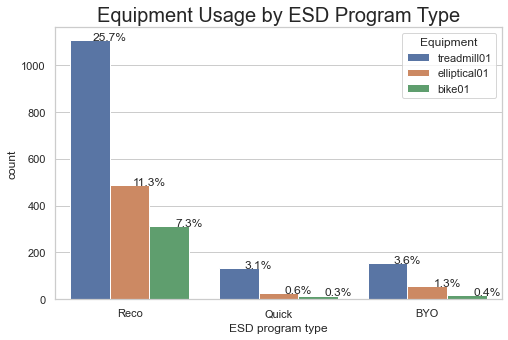

In [109]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="ESD program type", hue="Equipment", data=data_workout)
plt.title('Equipment Usage by ESD Program Type', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

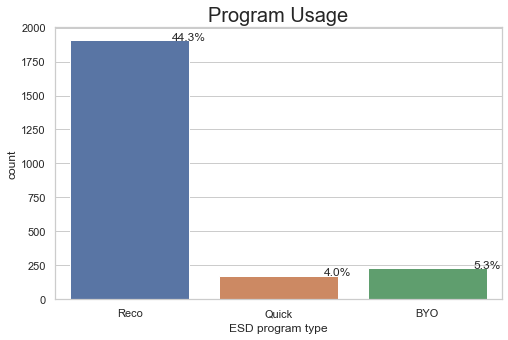

In [111]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="ESD program type", data=data_workout)
plt.title('Program Usage', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

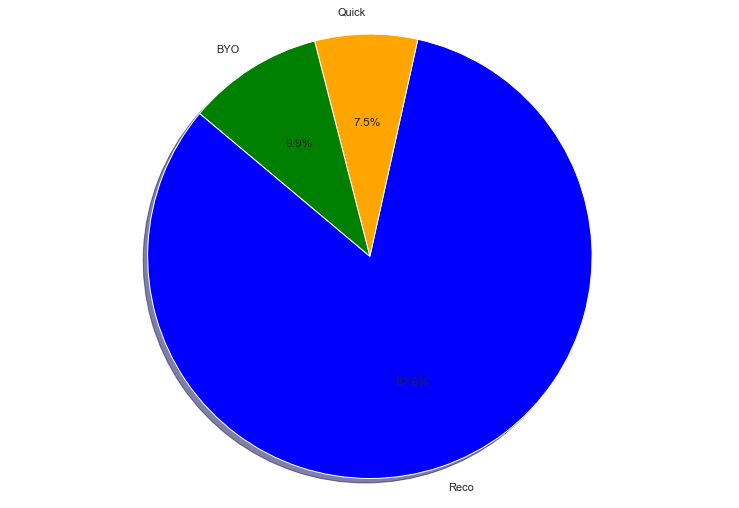

In [172]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Reco', 'Quick', 'BYO'
sizes = [44.3,4.0,5.3]
colors = ['blue', 'orange', 'green']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Checking for null values

In [27]:
print(finaldata.isnull().sum())

User ID                               0
Campus                                0
Location                              0
md5 of email                          0
Source Datetime                       0
Datetime                              0
Enterer ID                            0
Enterer Name                          0
Edit or new                           0
eval id                               0
source eval id                        0
Weight                                0
Pow PK                              395
Res.PK                              395
Res.PK unit                         395
Spd.PK                              395
Spd.PK unit                         395
HR.PK                               395
Pow VT                              395
Res.VT                              395
Res.VT unit                         395
Spd.VT                              395
Spd.VT unit                         395
HR.VT                               395
Test device                           0


In [28]:
#There are 3 columns which doesn't have any data so we are removing those 3 columns first and then we will remove the null values in other columns
finaldata.drop(['Classification','Reason','Comment'],axis=1,inplace=True)

# Dropping all the null values 

In [29]:
finaldata.dropna(inplace=True)

# Checking for data types and converting them into correct data types

In [30]:
finaldata.dtypes

User ID                              int64
Campus                              object
Location                            object
md5 of email                        object
Source Datetime                     object
Datetime                            object
Enterer ID                           int64
Enterer Name                        object
Edit or new                         object
eval id                              int64
source eval id                       int64
Weight                             float64
Pow PK                             float64
Res.PK                             float64
Res.PK unit                         object
Spd.PK                             float64
Spd.PK unit                         object
HR.PK                              float64
Pow VT                             float64
Res.VT                             float64
Res.VT unit                         object
Spd.VT                             float64
Spd.VT unit                         object
HR.VT      

# Some of the columns are not having correct data types

In [31]:
finaldata[['Source Datetime','Datetime','DateTime']] = finaldata[['Source Datetime','Datetime','DateTime']].astype('datetime64[ns]')

In [32]:
finaldata['DOB'] = pd.to_datetime(finaldata['DOB'])

In [33]:
finaldata.head()

User ID  Campus    Location                      md5 of email  \
0     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
2     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
3     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
5     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
6     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   

      Source Datetime            Datetime  Enterer ID Enterer Name  \
0 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
2 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
3 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
5 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
6 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   

  Edit or new  eval id  ...  Workout Number      Emphasis  Progression    ID  \
0         new     4236  ...            76.0     Threshold          6.0  1137   
2         new     4236  ...            87.0     Threshold         17.0  1137   
3         new     4236  ...           107.0  Leg Strength          9.0  1137   
5         new     4236  ...            88.0     Threshold         18.0  1137   
6         new     4236  ...            60.0      Recovery          3.0  1137   

             DateTime  campus name        DOB  Gender (M/F)  Member Type  \
0 2015-01-06 13:25:00       Humana 1979-01-31             F       Member   
2 2015-01-06 13:25:00       Humana 1979-01-31             F       Member   
3 2015-01-06 13:25:00       Humana 1979-01-31             F       Member   
5 2015-01-06 13:25:00       Humana 1979-01-31             F       Member   
6 2015-01-06 13:25:00       Humana 1979-01-31             F       Member   

   Status  
0  Active  
2  Active  
3  Active  
5  Active  
6  Active  

[5 rows x 44 columns]

In [34]:
#renaming some column names
finaldata = finaldata.rename(columns={'Gender (M/F)':'Gender',})

In [35]:
finaldata1 = finaldata.groupby('Gender').agg(Membertype = ('Member Type','count'),Status=('Status','count'))

In [36]:
finaldata1

Membertype  Status
Gender                    
F             3336    3336
M              969     969

In [59]:
finaldata2 = finaldata.groupby('Gender').agg(Equipment = ('Equipment','count'),Progression=('Progression','count'), Calories=('Calories','sum'))

In [57]:
finaldata2

Equipment  Progression      Calories
Gender                                      
F            3336         3336  353430.46733
M             969          969  140193.23142

In [164]:
np.sum(finaldata)

User ID                                                                      5673483
Campus                             HumanaHumanaHumanaHumanaHumanaHumanaHumanaHuma...
Location                           LouisvilleLouisvilleLouisvilleLouisvilleLouisv...
md5 of email                       3dc13797e7ebb0cb93f324d790562bf93dc13797e7ebb0...
Enterer ID                                                                   5673483
Enterer Name                       User 1137User 1137User 1137User 1137User 1137U...
Edit or new                        newnewnewnewnewnewnewnewnewnewnewnewnewnewnewn...
eval id                                                                     17285888
source eval id                                                              17285888
Weight                                                                        328048
Pow PK                                                                   3.52549e+06
Res.PK                                                           

In [167]:
finaldata1 = finaldata.groupby('Gender').agg(ID = ('ID','count'))
finaldata1

ID
Gender      
F       3336
M        969

In [37]:
eval_type = finaldata.groupby(['Eval type (self, vs IMETT, RPE)','Gender']).count().reset_index(drop=False)

In [38]:
eval_type

Eval type (self, vs IMETT, RPE) Gender  User ID  Campus  Location  \
0                           SEVAL      F     3336    3336      3336   
1                           SEVAL      M      969     969       969   

   md5 of email  Source Datetime  Datetime  Enterer ID  Enterer Name  ...  \
0          3336             3336      3336        3336          3336  ...   
1           969              969       969         969           969  ...   

   Equipment  Workout Number  Emphasis  Progression    ID  DateTime  \
0       3336            3336      3336         3336  3336      3336   
1        969             969       969          969   969       969   

   campus name   DOB  Member Type  Status  
0         3336  3336         3336    3336  
1          969   969          969     969  

[2 rows x 44 columns]

In [39]:
import plotly.express as px

In [178]:
finaldata.head()

User ID  Campus    Location                      md5 of email  \
0     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
2     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
3     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
5     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   
6     1137  Humana  Louisville  3dc13797e7ebb0cb93f324d790562bf9   

      Source Datetime            Datetime  Enterer ID Enterer Name  \
0 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
2 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
3 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
5 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   
6 2016-11-23 12:49:00 2016-11-23 12:49:00        1137    User 1137   

  Edit or new  eval id  ...  Workout Number      Emphasis  Progression    ID  \
0         new     4236  ...            76.0     Threshold          6.0  1137   
2         new     4236  ...            87.0     Threshold         17.0  1137   
3         new     4236  ...           107.0  Leg Strength          9.0  1137   
5         new     4236  ...            88.0     Threshold         18.0  1137   
6         new     4236  ...            60.0      Recovery          3.0  1137   

             DateTime  campus name        DOB  Gender  Member Type  Status  
0 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
2 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
3 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
5 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  
6 2015-01-06 13:25:00       Humana 1979-01-31       F       Member  Active  

[5 rows x 44 columns]

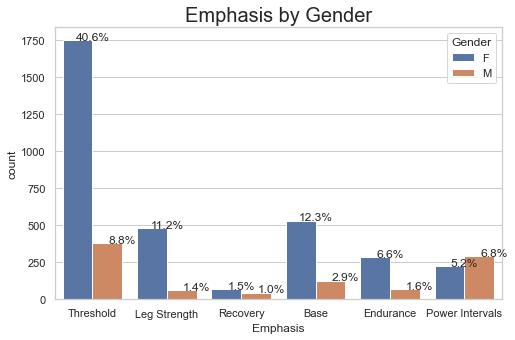

In [180]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="Emphasis", hue="Gender", data=finaldata)
plt.title('Emphasis by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

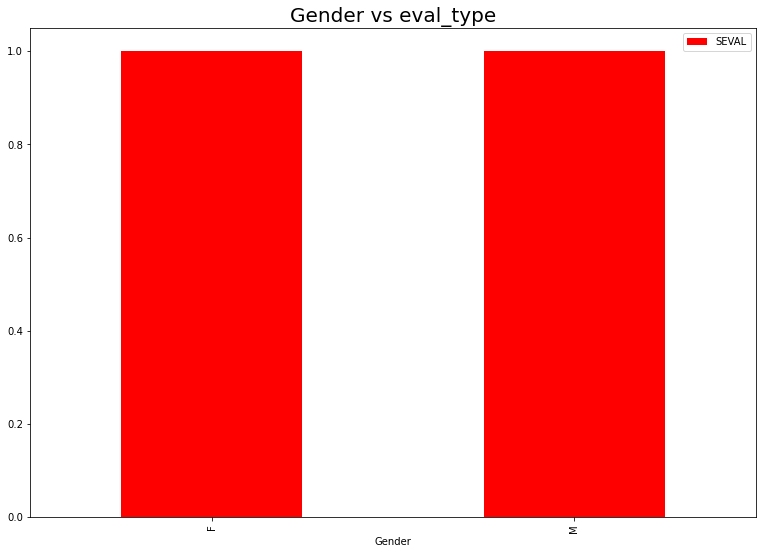

In [45]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(finaldata['Gender'], finaldata['Eval type (self, vs IMETT, RPE)'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('Gender vs eval_type', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

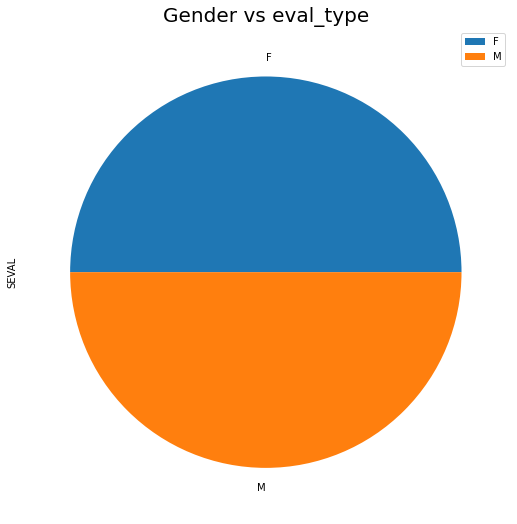

In [50]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(finaldata['Gender'], finaldata['Eval type (self, vs IMETT, RPE)'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'pie',subplots=True)
plt.title('Gender vs eval_type', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

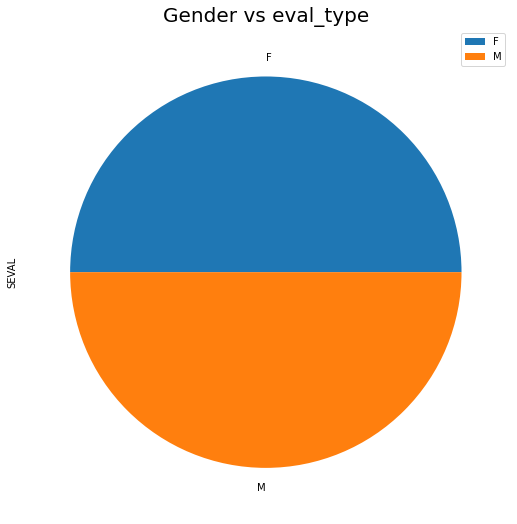

In [49]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(finaldata['Gender'], finaldata['Workout Number'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'pie',subplots=True)
plt.title('Gender vs eval_type', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

# In the data only 'SEVAL' evaluation type

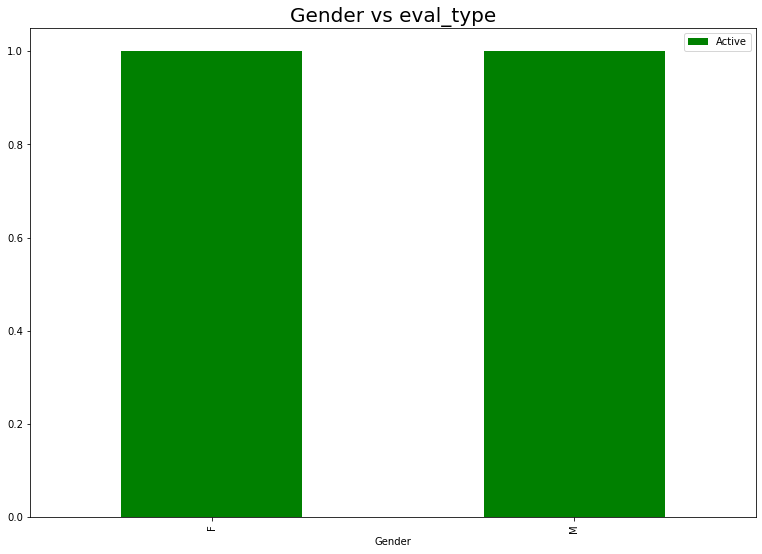

In [61]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(finaldata['Gender'], finaldata['Status'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['Green','yellow'])
plt.title('Gender vs eval_type', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

# In the dataset given all the members are active 

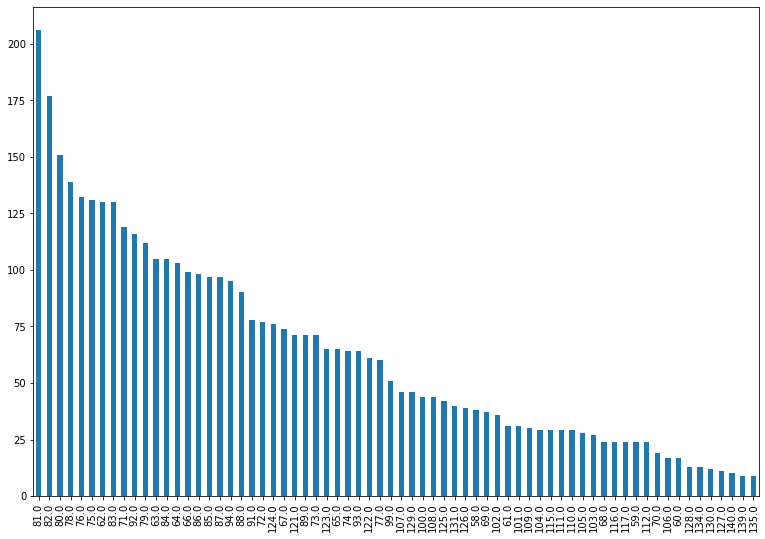

In [62]:
finaldata['Workout Number'].value_counts().plot.bar()

In [63]:
gender = finaldata.groupby(['Gender','Workout Number']).count().reset_index(drop=False)

In [64]:
fig = px.bar(gender, y='Gender', x='Workout Number', orientation='h',color='Gender', barmode='group')
fig.show()

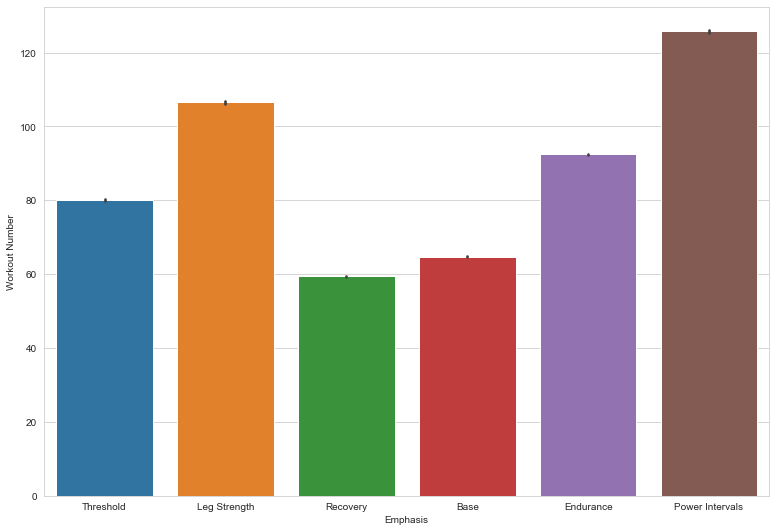

In [90]:
sns.barplot(x='Emphasis',y='Workout Number',data=finaldata)


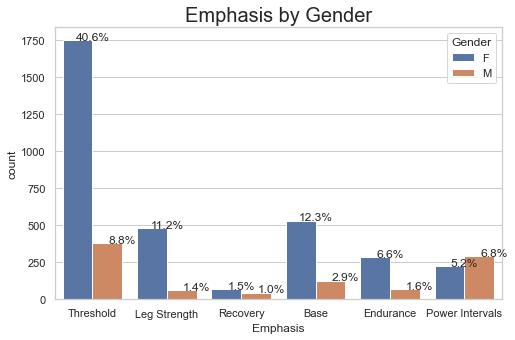

In [99]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="Emphasis", hue="Gender", data=finaldata)
plt.title('Emphasis by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

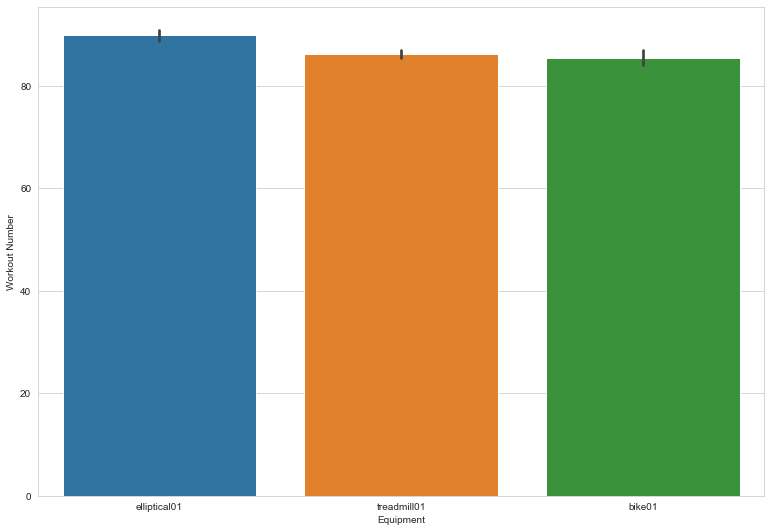

In [84]:
sns.barplot(x='Equipment',y='Workout Number',data=finaldata)

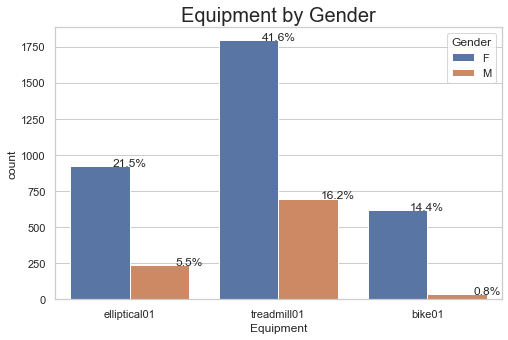

In [177]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="Equipment", hue="Gender", data=finaldata)
plt.title('Equipment by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

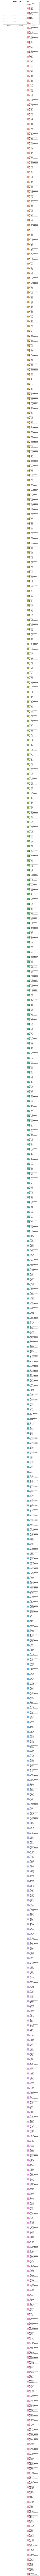

In [175]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="Emphasis", hue="Gender", data=finaldata)
plt.title('Emphasis by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

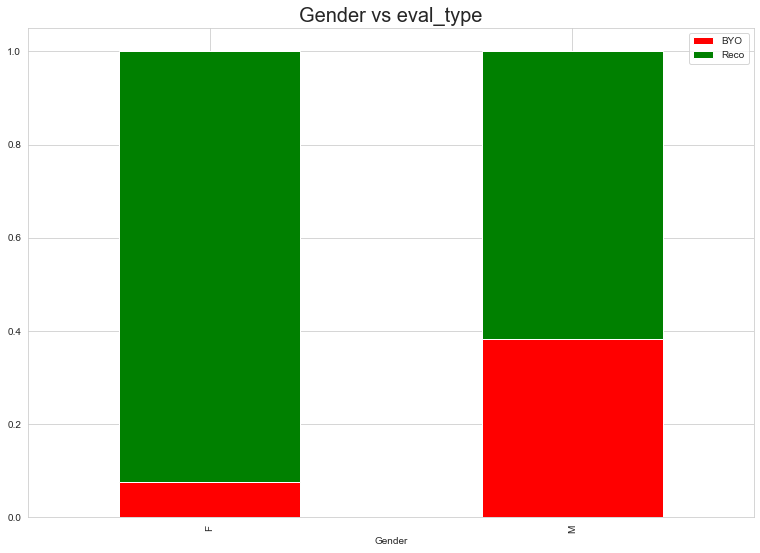

In [85]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(finaldata['Gender'], finaldata['ESD program type'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'])
plt.title('Gender vs eval_type', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

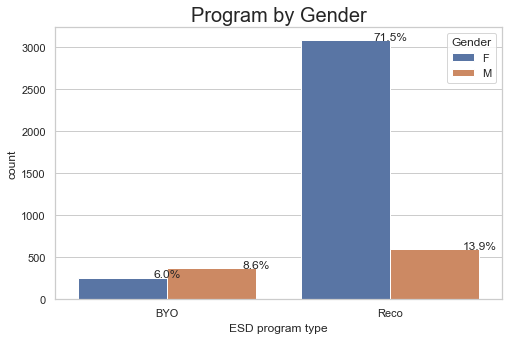

In [168]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(finaldata))
ax = sns.countplot(x="ESD program type", hue="Gender", data=finaldata)
plt.title(' by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [181]:

px.scatter(finaldata,x='Actual Duration (seconds)',y='Selected Duration',color='Gender')